<a href="https://colab.research.google.com/github/bpriantti/Data_Wralling_Com_Python_Utilizando_o_Pandas/blob/main/Data_Wralling_com_Python_Utilizando_o_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wralling com Python - Utilizando o Pandas.
____

__Objetivo:__   

O presente repositório visa abordar de forma auto-explicativa e orientada os principais metodos de __Data Wralling Utilizando a Biblioteca Pandas__ na linguagem python, sendo assim um guia para a programação na linguagem servindo também como repositório para esclarecimento de dúvidas durante o desenvolvimento.

__Autor:__  
   - Bruno Priantti.
    
__Contato:__  
  - b.priantti@outlook.com

__Encontre-me:__  
   -  https://www.linkedin.com/in/bpriantti/  
   -  https://github.com/bpriantti
   -  https://www.instagram.com/brunopriantti/
   
___

## Definição:

Define-se como data wralling o processo de manipulação da base de dados, no sentido de estruturação de informação organizada. Para isso utilizaremos uma ou se não a biblioteca mais utilizada no python chamada pandas, segue o link para a documentação:

https://pandas.pydata.org/docs/

Primeiro de tudo devemos entender o conceito de DataFrame, entendemos como DataFrame o aquivo do tipo pandas, normalmente deriva de um (.csv) ou de uma base de dados SQL, os dataframes carregam dados em linhas e colunas e são uma fonte de informação estruturada.


In [3]:
#para instalar o pandas:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
#importando a biblioteca
import pandas as pd

#visuaizando atributos e metodos.
pd.__dict__

{'BooleanDtype': pandas.core.arrays.boolean.BooleanDtype,
 'Categorical': pandas.core.arrays.categorical.Categorical,
 'CategoricalDtype': pandas.core.dtypes.dtypes.CategoricalDtype,
 'CategoricalIndex': pandas.core.indexes.category.CategoricalIndex,
 'DataFrame': pandas.core.frame.DataFrame,
 'DateOffset': pandas._libs.tslibs.offsets.DateOffset,
 'DatetimeIndex': pandas.core.indexes.datetimes.DatetimeIndex,
 'DatetimeTZDtype': pandas.core.dtypes.dtypes.DatetimeTZDtype,
 'ExcelFile': pandas.io.excel._base.ExcelFile,
 'ExcelWriter': pandas.io.excel._base.ExcelWriter,
 'Flags': pandas.core.flags.Flags,
 'Float32Dtype': pandas.core.arrays.floating.Float32Dtype,
 'Float64Dtype': pandas.core.arrays.floating.Float64Dtype,
 'Float64Index': pandas.core.indexes.numeric.Float64Index,
 'Grouper': pandas.core.groupby.grouper.Grouper,
 'HDFStore': pandas.io.pytables.HDFStore,
 'Index': pandas.core.indexes.base.Index,
 'IndexSlice': <pandas.core.indexing._IndexSlice at 0x7f62db57ff50>,
 'Int16Dtype'

___
##Dict para Pandas:

podemos transformar um dict do python em um arquivo pandas, para a melhor visualização e posterior tratamento dos dados.

In [25]:
#conectando API com o site da B3.

import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://www2.cetip.com.br/ConsultarTaxaDi/ConsultarTaxaDICetip.aspx'

try:
 resposta = requests.get(URL)
 resposta.raise_for_status()
except HTTPError as exc:
 print(exc)
else:
 conteudo = resposta.text

#visualizando em formato json
import json
data = json.loads(conteudo)
print(data)


{'taxa': '12,65', 'dataTaxa': '07/06/2022', 'indice': '35.259,35', 'dataIndice': '08/06/2022'}


In [35]:
#como vimos um arquivo json possui as  mesmas caracteristicas de um arquivo dict
#, vamos agora transforma-lo em um arquivo pandas.

data = dict(data)

print(data.keys())
print(data.values())
print(data.items())

dict_keys(['taxa', 'dataTaxa', 'indice', 'dataIndice'])
dict_values(['12,65', '07/06/2022', '35.259,35', '08/06/2022'])
dict_items([('taxa', '12,65'), ('dataTaxa', '07/06/2022'), ('indice', '35.259,35'), ('dataIndice', '08/06/2022')])


In [42]:
#Para criarmos o dataframe
df_cdi = pd.DataFrame(data = list(data.items()), columns = ['keys','values'])

#data: atributo em que se insere as informacoes para o dataframe.
#columns: nome dados as colunas do dataframe.

#verificando na saida
print(df_cdi)
print('')
#tambem podemos utilziar
df_cdi

         keys      values
0        taxa       12,65
1    dataTaxa  07/06/2022
2      indice   35.259,35
3  dataIndice  08/06/2022



,keys,values
0,taxa,"12,65"
1,dataTaxa,07/06/2022
2,indice,"35.259,35"
3,dataIndice,08/06/2022


In [43]:
#verificando o tipo, veremos que o objeto é da classe pandas.core.fame.Dataframe
type(df_cdi)

pandas.core.frame.DataFrame

## Lista de principais atributos e da classe pandas:



In [49]:
#verifica as colunas no dataframe
print(df_cdi.columns)

#verifica o tipo de cada coluna no dataframe
print(df_cdi.dtypes)

#verifica o indice do dataframe
print(df_cdi.index)

#verifica o numero de linhas e colunas do dataframe
print(df_cdi.shape)


Index(['keys', 'values'], dtype='object')
keys      object
values    object
dtype: object
RangeIndex(start=0, stop=4, step=1)
(4, 2)


In [61]:
#caso queiramos utilizar o codigo acima de uma forma 'pythonica'

#utilizando uma lista de comandos
sequencia = [df_cdi.columns, df_cdi.dtypes , df_cdi.index, df_cdi.shape]

#utilizando map para aplicar para a sequencia
sequencia_map = list(map(lambda x: print(x), sequencia))


Index(['keys', 'values'], dtype='object')
keys      object
values    object
dtype: object
RangeIndex(start=0, stop=4, step=1)
(4, 2)


## Lista de principais metodos e da classe pandas:

In [64]:
#lista o inicio do dataframe.
print(df_cdi.head(),'\n')

#lista o fim do dataframe.
print(df_cdi.tail(),'\n')

#lista inforamcoes do dataframe.
print(df_cdi.info(),'\n')

#lista informacoes do dataframe, media,min,max,count dentre outras.
print(df_cdi.describe(),'\n')

         keys      values
0        taxa       12,65
1    dataTaxa  07/06/2022
2      indice   35.259,35
3  dataIndice  08/06/2022 

         keys      values
0        taxa       12,65
1    dataTaxa  07/06/2022
2      indice   35.259,35
3  dataIndice  08/06/2022 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   keys    4 non-null      object
 1   values  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes
None 

        keys values
count      4      4
unique     4      4
top     taxa  12,65
freq       1      1 



## Arquivo .csv para dataframe:
podemos ler um arquivo .csv e manipulado como dataframe com o pandas, para isso primeiros valor criar um arquivo .csv aqui no colab.

In [65]:
%%writefile arquivo.csv

R&D Spend,Administration,Marketing Spend,State,Profit
165349.2,136897.8,471784.1,New York,192261.83
162597.7,151377.59,443898.53,California,191792.06
153441.51,101145.55,407934.54,Florida,191050.39
144372.41,118671.85,383199.62,New York,182901.99
142107.34,91391.77,366168.42,Florida,166187.94
131876.9,99814.71,362861.36,New York,156991.12
134615.46,147198.87,127716.82,California,156122.51
130298.13,145530.06,323876.68,Florida,155752.6
120542.52,148718.95,311613.29,New York,152211.77
123334.88,108679.17,304981.62,California,149759.96
101913.08,110594.11,229160.95,Florida,146121.95
100671.96,91790.61,249744.55,California,144259.4
93863.75,127320.38,249839.44,Florida,141585.52
91992.39,135495.07,252664.93,California,134307.35
119943.24,156547.42,256512.92,Florida,132602.65
114523.61,122616.84,261776.23,New York,129917.04


Writing arquivo.csv


In [68]:
#para realizar o input do arquivo csv
df_arquivo = pd.read_csv('arquivo.csv', sep = ',')

#para exibir o dataframe
df_arquivo.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [69]:
#vamos realizar o uso de alguns metodos do pandas.

#aqui ele verifica informacoes estatisticas do dataframe apenas para as colunas quantitativas
df_arquivo.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,16.000000,16.000000,16.000000,16.000000
mean,126965.255000,124611.921875,312733.375000,157739.130000
std,23045.367297,22177.904606,89661.632158,21290.858284
min,91992.390000,91391.770000,127716.820000,129917.040000
25%,111370.977500,106795.765000,251958.557500,143590.930000
50%,126816.505000,124968.610000,308297.455000,153982.185000
75%,142673.607500,145947.262500,370426.220000,170366.452500
max,165349.200000,156547.420000,471784.100000,192261.830000


## Selecao:

Selecionando linhas e colunas:

In [70]:
#vamos selecionar linhas do dataframe, para isso utilziamos .loc
df_arquivo.loc[0]

R&D Spend           165349.2
Administration      136897.8
Marketing Spend     471784.1
State               New York
Profit             192261.83
Name: 0, dtype: object

In [71]:
#caso queiramos selecionar mais de uma linha
df_arquivo.loc[0:2]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [75]:
#selecionando colunas
df_arquivo['R&D Spend']

0     165349.20
1     162597.70
2     153441.51
3     144372.41
4     142107.34
5     131876.90
6     134615.46
7     130298.13
8     120542.52
9     123334.88
10    101913.08
11    100671.96
12     93863.75
13     91992.39
14    119943.24
15    114523.61
Name: R&D Spend, dtype: float64

In [90]:
#selecionando apenas colunas desejadas
df_arquivo.iloc[0:,[1,3]]

,Administration,State
0,136897.80,New York
1,151377.59,California
2,101145.55,Florida
3,118671.85,New York
4,91391.77,Florida
5,99814.71,New York
6,147198.87,California
7,145530.06,Florida
8,148718.95,New York
9,108679.17,California


__Observe que:__

- loc() é um método de seleção de dados baseado em rótulo, o que significa que temos que passar o nome da linha ou coluna que queremos selecionar.

- loc() é um método de seleção baseado em indexação, o que significa que temos que passar o índice inteiro no método para selecionar uma linha/coluna específica

## Agrupamento:

Com o pandas podemos agregar,  por meio de uma metrica, como media, soma,min,max e por ai vai.

__Metodo Agregate:__

In [93]:
sum_series = df_arquivo[['R&D Spend','Profit']].agg('sum')

sum_series

R&D Spend    2031444.08
Profit       2523826.08
dtype: float64

In [95]:
mean_series = df_arquivo[['R&D Spend','Profit']].agg(['mean','sum'])

mean_series

,R&D Spend,Profit
mean,126965.255,157739.13
sum,2031444.080,2523826.08


__Metodo groupby:__

In [114]:
grouped_sum_df = df_arquivo[['R&D Spend','Profit','State']].groupby('State').agg(['mean'])
grouped_sum_df

,R&D Spend,Profit
,mean,mean
State,,
California,122642.478000,155248.256
Florida,123594.508333,155550.175
New York,135332.928000,162856.750


__Metodo ordenate:__

In [100]:
df_arquivo.sort_values(by=['Profit'])

,R&D Spend,Administration,Marketing Spend,State,Profit
15,114523.61,122616.84,261776.23,New York,129917.04
14,119943.24,156547.42,256512.92,Florida,132602.65
13,91992.39,135495.07,252664.93,California,134307.35
12,93863.75,127320.38,249839.44,Florida,141585.52
11,100671.96,91790.61,249744.55,California,144259.40
10,101913.08,110594.11,229160.95,Florida,146121.95
9,123334.88,108679.17,304981.62,California,149759.96
8,120542.52,148718.95,311613.29,New York,152211.77
7,130298.13,145530.06,323876.68,Florida,155752.60
6,134615.46,147198.87,127716.82,California,156122.51


In [101]:
#visualizando de forma decrescente
df_arquivo.sort_values(by=['Profit'], ascending = False)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#Visualização:  

podemos utilizar o pandas para visualizar dados tambem, no entando existem tecnicas melhores em outras biblios mas para o caso agora vamos utilizar o método .plot()


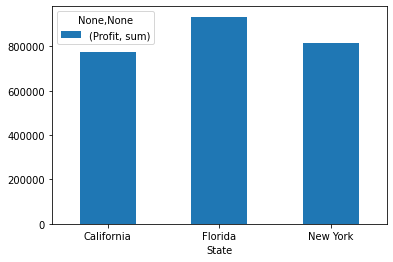

In [122]:
#visualiando o profit por estado
df_arquivo[['Profit','State']].groupby('State').agg(['sum']).plot.bar(rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f62d6056c10>],
      dtype=object)

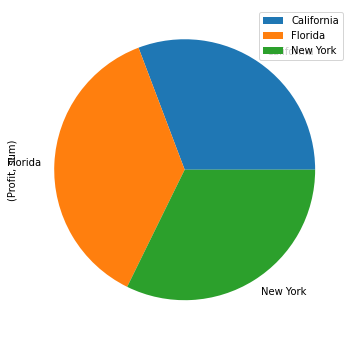

In [126]:
#visualizando
df_arquivo[['Profit','State']].groupby('State').agg(['sum']).plot.pie(subplots=True, figsize=(11, 6))

#Tratando Dados Nulos:

Valores nulos em um DataFrame Pandas ocorrem quando o pacote não consegue entender o dado da fonte de dados:

Exemplos:
Colunas categóricas com valores vazios (Nan);  
Colunas numéricas com valores nulos ( None );

In [127]:
#utilize para verificar dados nulos
df_arquivo.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [130]:
#tambem podemos utilizar
df_arquivo.isnull().any().any()

False

In [132]:
#utilizamos para remover valores nulos
df_arquivo.dropna()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [134]:
#utilizamos para preecher com outro caracter
df_arquivo.fillna('')

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96
